In [ ]:
###  TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU  ###
#1 Chu·∫©n h√≥a  (Normalize) : chu·∫©n h√≥a bi√™n ƒë·ªô √¢m thanh v·ªÅ kho·∫£ng [-5,5] 
#2. C·∫Øt b·ªè kho·∫£ng l·∫∑ng (Trim): lo·∫°i b·ªè kho·∫£ng l·∫∑ng ƒë·∫ßu/cu·ªëi
#3. Gi·∫£m nhi·ªÖu (Nosie Reduction): Lo·∫°i b·ªè c√°c nhi·ªÖu n·ªÅn d√πng th∆∞ vi·ªán noisereduce
#4. K√©o d√£n th·ªùi gian (Time Strecth) rate=0.6 
#5. Thay ƒë·ªïi cao ƒë·ªô (Pitch shift): tƒÉng cao ƒë·ªô l√™n 0.8 
#6. Th√™m nhi·ªÖu: th√™m Gaussian ng·∫´u nhi·ªÖn tƒÉng t√≠nh ƒëa d·∫°ng c·ªßa d·ªØ li·ªáu

In [6]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho 6 b∆∞·ªõc x·ª≠ l√Ω √¢m thanh
import numpy as np
import noisereduce as nr
from IPython.display import Audio, display
import matplotlib.pyplot as plt

c:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 

In [4]:

# Ki·ªÉm tra ƒë∆∞·ªùng d·∫´n 
import os
print(os.path.exists(audio))


True


In [7]:
sr = 22050 
display(Audio(audio, rate=sr))

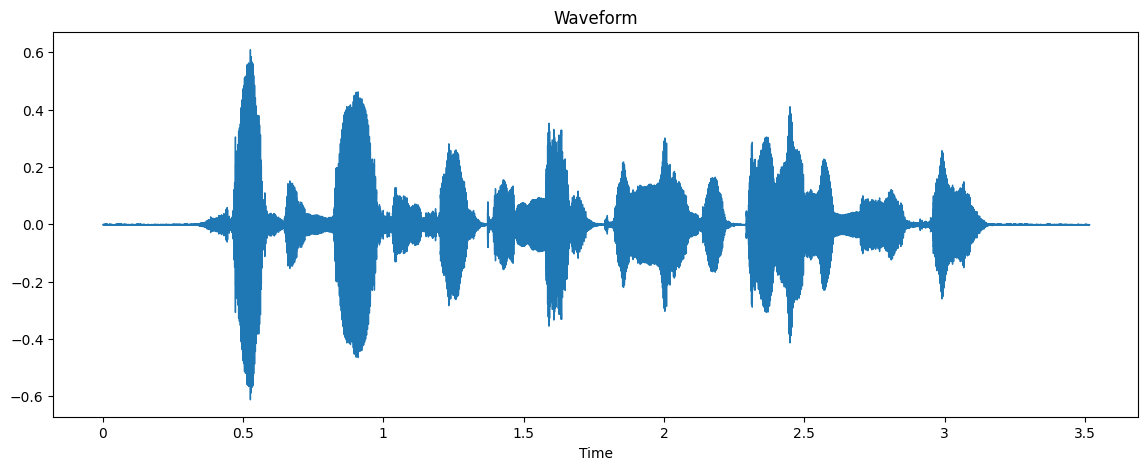

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y , sr = librosa.load(audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

In [ ]:
## C√°c b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu √¢m thanh

In [10]:
# B∆∞·ªõc 1: H√†m chu·∫©n h√≥a amplitude v·ªÅ kho·∫£ng [-5, 5]
def normalize_audio(audio, target_range=5):
    """
    Chu·∫©n h√≥a amplitude c·ªßa audio v·ªÅ kho·∫£ng [-target_range, target_range]
    """
    # T√¨m gi√° tr·ªã max c·ªßa amplitude
    max_val = np.max(np.abs(audio))
    
    # Tr√°nh chia cho 0
    if max_val == 0:
        return audio
    
    # Chu·∫©n h√≥a v·ªÅ [-target_range, target_range]
    normalized_audio = (audio / max_val) * target_range
    
    return normalized_audio

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m normalize_audio")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m normalize_audio


In [11]:
# B∆∞·ªõc 2: H√†m c·∫Øt b·ªè kho·∫£ng l·∫∑ng
def trim_silence(audio, sr, top_db=20):
    """
    C·∫Øt b·ªè kho·∫£ng l·∫∑ng ·ªü ƒë·∫ßu v√† cu·ªëi audio
    """
    # Trim silence t·ª´ ƒë·∫ßu v√† cu·ªëi
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=top_db)
    
    return trimmed_audio

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m trim_silence")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m trim_silence


In [12]:
# B∆∞·ªõc 3: H√†m gi·∫£m nhi·ªÖu
def reduce_noise(audio, sr):
    """
    Gi·∫£m nhi·ªÖu n·ªÅn s·ª≠ d·ª•ng noisereduce
    """
    # S·ª≠ d·ª•ng noisereduce ƒë·ªÉ lo·∫°i b·ªè noise
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    
    return reduced_noise

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m reduce_noise")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m reduce_noise


In [13]:
# B∆∞·ªõc 4: H√†m k√©o d√£n th·ªùi gian (Time Stretch)
def time_stretch(audio, rate=0.6):
    """
    K√©o d√£n th·ªùi gian c·ªßa audio v·ªõi t·ª∑ l·ªá rate
    rate < 1 s·∫Ω l√†m ch·∫≠m audio (k√©o d√†i th·ªùi gian)
    rate > 1 s·∫Ω l√†m nhanh audio (r√∫t ng·∫Øn th·ªùi gian)
    """
    # S·ª≠ d·ª•ng librosa ƒë·ªÉ time stretch
    stretched_audio = librosa.effects.time_stretch(audio, rate=rate)
    
    return stretched_audio

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m time_stretch")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m time_stretch


In [14]:
# B∆∞·ªõc 5: H√†m thay ƒë·ªïi cao ƒë·ªô (Pitch Shift)
def pitch_shift(audio, sr, n_steps=0.8):
    """
    Thay ƒë·ªïi cao ƒë·ªô c·ªßa audio
    n_steps > 0: tƒÉng cao ƒë·ªô
    n_steps < 0: gi·∫£m cao ƒë·ªô
    """
    # S·ª≠ d·ª•ng librosa ƒë·ªÉ pitch shift
    shifted_audio = librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)
    
    return shifted_audio

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m pitch_shift")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m pitch_shift


In [15]:
# B∆∞·ªõc 6: H√†m th√™m nhi·ªÖu Gaussian
def add_gaussian_noise(audio, noise_level=0.005):
    """
    Th√™m nhi·ªÖu Gaussian ng·∫´u nhi√™n ƒë·ªÉ tƒÉng t√≠nh ƒëa d·∫°ng c·ªßa d·ªØ li·ªáu
    """
    # T·∫°o noise ng·∫´u nhi√™n v·ªõi c√πng k√≠ch th∆∞·ªõc v·ªõi audio
    noise = np.random.normal(0, noise_level, audio.shape)
    
    # Th√™m noise v√†o audio g·ªëc
    noisy_audio = audio + noise
    
    return noisy_audio

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m add_gaussian_noise")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a h√†m add_gaussian_noise


In [16]:
# Th·ª±c hi·ªán 6 b∆∞·ªõc x·ª≠ l√Ω √¢m thanh tu·∫ßn t·ª±
print("B·∫Øt ƒë·∫ßu x·ª≠ l√Ω audio...")
print(f"Audio g·ªëc - Shape: {y.shape}, Duration: {len(y)/sr:.2f}s, Min: {np.min(y):.3f}, Max: {np.max(y):.3f}")

# Kh·ªüi t·∫°o audio ƒë·ªÉ x·ª≠ l√Ω
processed_audio = y.copy()

# B∆Ø·ªöC 1: Chu·∫©n h√≥a amplitude v·ªÅ kho·∫£ng [-5, 5]
print("\n1. Chu·∫©n h√≥a amplitude v·ªÅ [-5, 5]...")
processed_audio = normalize_audio(processed_audio, target_range=5)
print(f"   Sau chu·∫©n h√≥a - Min: {np.min(processed_audio):.3f}, Max: {np.max(processed_audio):.3f}")

# B∆Ø·ªöC 2: C·∫Øt b·ªè kho·∫£ng l·∫∑ng
print("\n2. C·∫Øt b·ªè kho·∫£ng l·∫∑ng...")
before_trim_len = len(processed_audio)
processed_audio = trim_silence(processed_audio, sr, top_db=20)
print(f"   Tr∆∞·ªõc trim: {before_trim_len/sr:.2f}s -> Sau trim: {len(processed_audio)/sr:.2f}s")

# B∆Ø·ªöC 3: Gi·∫£m nhi·ªÖu n·ªÅn
print("\n3. Gi·∫£m nhi·ªÖu n·ªÅn...")
processed_audio = reduce_noise(processed_audio, sr)
print(f"   Ho√†n th√†nh gi·∫£m nhi·ªÖu - Shape: {processed_audio.shape}")

# B∆Ø·ªöC 4: K√©o d√£n th·ªùi gian (rate=0.6)
print("\n4. K√©o d√£n th·ªùi gian v·ªõi rate=0.6...")
before_stretch_len = len(processed_audio)
processed_audio = time_stretch(processed_audio, rate=0.6)
print(f"   Tr∆∞·ªõc stretch: {before_stretch_len/sr:.2f}s -> Sau stretch: {len(processed_audio)/sr:.2f}s")

# B∆Ø·ªöC 5: Thay ƒë·ªïi cao ƒë·ªô (tƒÉng 0.8 semitones)
print("\n5. Thay ƒë·ªïi cao ƒë·ªô (+0.8 semitones)...")
processed_audio = pitch_shift(processed_audio, sr, n_steps=0.8)
print(f"   Ho√†n th√†nh thay ƒë·ªïi cao ƒë·ªô - Shape: {processed_audio.shape}")

# B∆Ø·ªöC 6: Th√™m nhi·ªÖu Gaussian
print("\n6. Th√™m nhi·ªÖu Gaussian...")
processed_audio = add_gaussian_noise(processed_audio, noise_level=0.005)
print(f"   Ho√†n th√†nh th√™m noise - Min: {np.min(processed_audio):.3f}, Max: {np.max(processed_audio):.3f}")

print("\n‚úÖ HO√ÄN TH√ÄNH T·∫§T C·∫¢ 6 B∆Ø·ªöC X·ª¨ L√ù!")

B·∫Øt ƒë·∫ßu x·ª≠ l√Ω audio...
Audio g·ªëc - Shape: (77506,), Duration: 3.52s, Min: -0.436, Max: 0.611

1. Chu·∫©n h√≥a amplitude v·ªÅ [-5, 5]...
   Sau chu·∫©n h√≥a - Min: -3.573, Max: 5.000

2. C·∫Øt b·ªè kho·∫£ng l·∫∑ng...
   Tr∆∞·ªõc trim: 3.52s -> Sau trim: 2.69s

3. Gi·∫£m nhi·ªÖu n·ªÅn...
   Ho√†n th√†nh gi·∫£m nhi·ªÖu - Shape: (59392,)

4. K√©o d√£n th·ªùi gian v·ªõi rate=0.6...
   Tr∆∞·ªõc stretch: 2.69s -> Sau stretch: 4.49s

5. Thay ƒë·ªïi cao ƒë·ªô (+0.8 semitones)...
   Ho√†n th√†nh thay ƒë·ªïi cao ƒë·ªô - Shape: (98987,)

6. Th√™m nhi·ªÖu Gaussian...
   Ho√†n th√†nh th√™m noise - Min: -1.311, Max: 1.121

‚úÖ HO√ÄN TH√ÄNH T·∫§T C·∫¢ 6 B∆Ø·ªöC X·ª¨ L√ù!
   Tr∆∞·ªõc trim: 3.52s -> Sau trim: 2.69s

3. Gi·∫£m nhi·ªÖu n·ªÅn...
   Ho√†n th√†nh gi·∫£m nhi·ªÖu - Shape: (59392,)

4. K√©o d√£n th·ªùi gian v·ªõi rate=0.6...
   Tr∆∞·ªõc stretch: 2.69s -> Sau stretch: 4.49s

5. Thay ƒë·ªïi cao ƒë·ªô (+0.8 semitones)...
   Ho√†n th√†nh thay ƒë·ªïi cao ƒë·ªô - Shape: (98987,)

6. Th√™m n

In [17]:
# L∆∞u file audio ƒë√£ x·ª≠ l√Ω
import os
from scipy.io.wavfile import write

# T·∫°o th∆∞ m·ª•c output n·∫øu ch∆∞a c√≥
output_dir = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry"
os.makedirs(output_dir, exist_ok=True)

# T·∫°o t√™n file output (th√™m "_processed" v√†o t√™n g·ªëc)
original_filename = os.path.basename(audio)
name_without_ext = os.path.splitext(original_filename)[0]
output_filename = f"{name_without_ext}_processed.wav"
output_path = os.path.join(output_dir, output_filename)

# Chu·∫©n h√≥a audio v·ªÅ kho·∫£ng [-1, 1] ƒë·ªÉ l∆∞u file WAV
normalized_for_save = processed_audio / np.max(np.abs(processed_audio))

# L∆∞u file WAV
write(output_path, sr, (normalized_for_save * 32767).astype(np.int16))

print(f"‚úÖ ƒê√£ l∆∞u file audio ƒë√£ x·ª≠ l√Ω t·∫°i: {output_path}")
print(f"üìÅ Th∆∞ m·ª•c l∆∞u tr·ªØ: {output_dir}")
print(f"üéµ T√™n file: {output_filename}")

# Hi·ªÉn th·ªã th√¥ng tin file ƒë√£ l∆∞u
print(f"\nüìä Th√¥ng tin file ƒë√£ l∆∞u:")
print(f"   - ƒê∆∞·ªùng d·∫´n: {output_path}")
print(f"   - T·ªìn t·∫°i: {os.path.exists(output_path)}")
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path)
    print(f"   - K√≠ch th∆∞·ªõc: {file_size:,} bytes ({file_size/1024:.2f} KB)")

‚úÖ ƒê√£ l∆∞u file audio ƒë√£ x·ª≠ l√Ω t·∫°i: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav
üìÅ Th∆∞ m·ª•c l∆∞u tr·ªØ: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry
üéµ T√™n file: 0001_000358_processed.wav

üìä Th√¥ng tin file ƒë√£ l∆∞u:
   - ƒê∆∞·ªùng d·∫´n: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav
   - T·ªìn t·∫°i: True
   - K√≠ch th∆∞·ªõc: 198,018 bytes (193.38 KB)


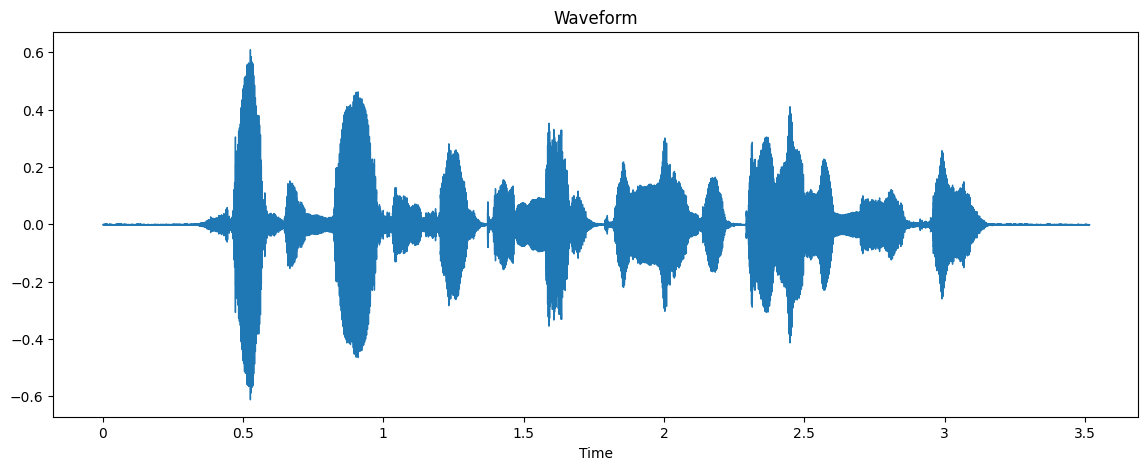

In [18]:
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 
sr = 22050 
y , sr = librosa.load(audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


In [19]:
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 


In [20]:
# Ki·ªÉm tra ƒë∆∞·ªùng d·∫´n 
import os
print(os.path.exists(audio_processed))

True


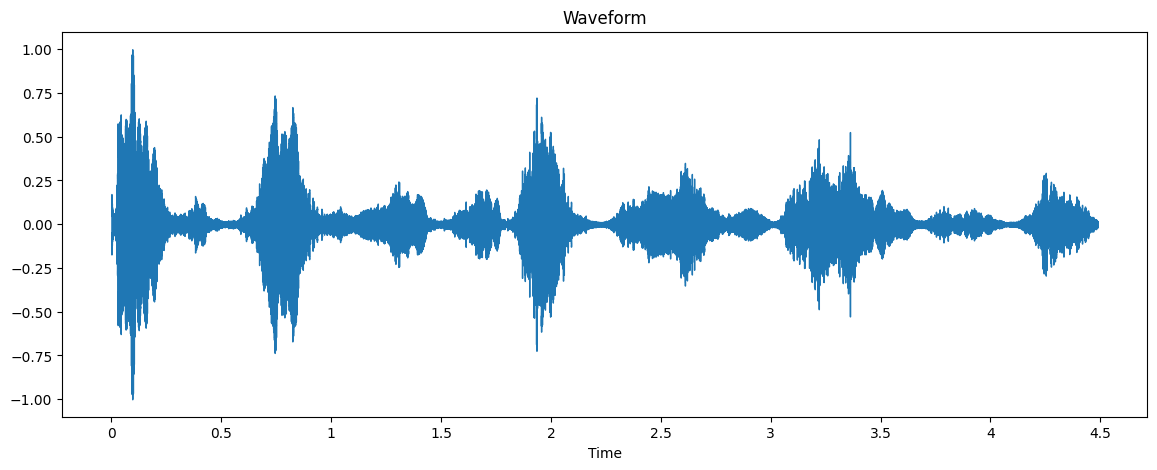

In [22]:
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 
sr = 22050 
y_processed , sr = librosa.load(audio_processed, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_processed, sr=sr)
plt.title('Waveform')
plt.show()


In [ ]:
## So s√°nh audio g·ªëc v√† audio ƒë√£ x·ª≠ l√Ω

In [ ]:
## so s√°nh bi√™n ƒë·ªô √¢m 

c:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\display.py:801: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_21992\1402603491.py:28: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MyPC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MyPC\AppData\Local\Temp\ipykernel_21992\1402603491.py:28: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Roaming\Python\Python311\sit

üìä So s√°nh Audio:
   üéµ Audio g·ªëc     - Duration: 3.52s, Shape: (77506,)
   üîß Audio x·ª≠ l√Ω   - Duration: 4.49s, Shape: (98987,)
   üìà Thay ƒë·ªïi th·ªùi gian: +27.7%


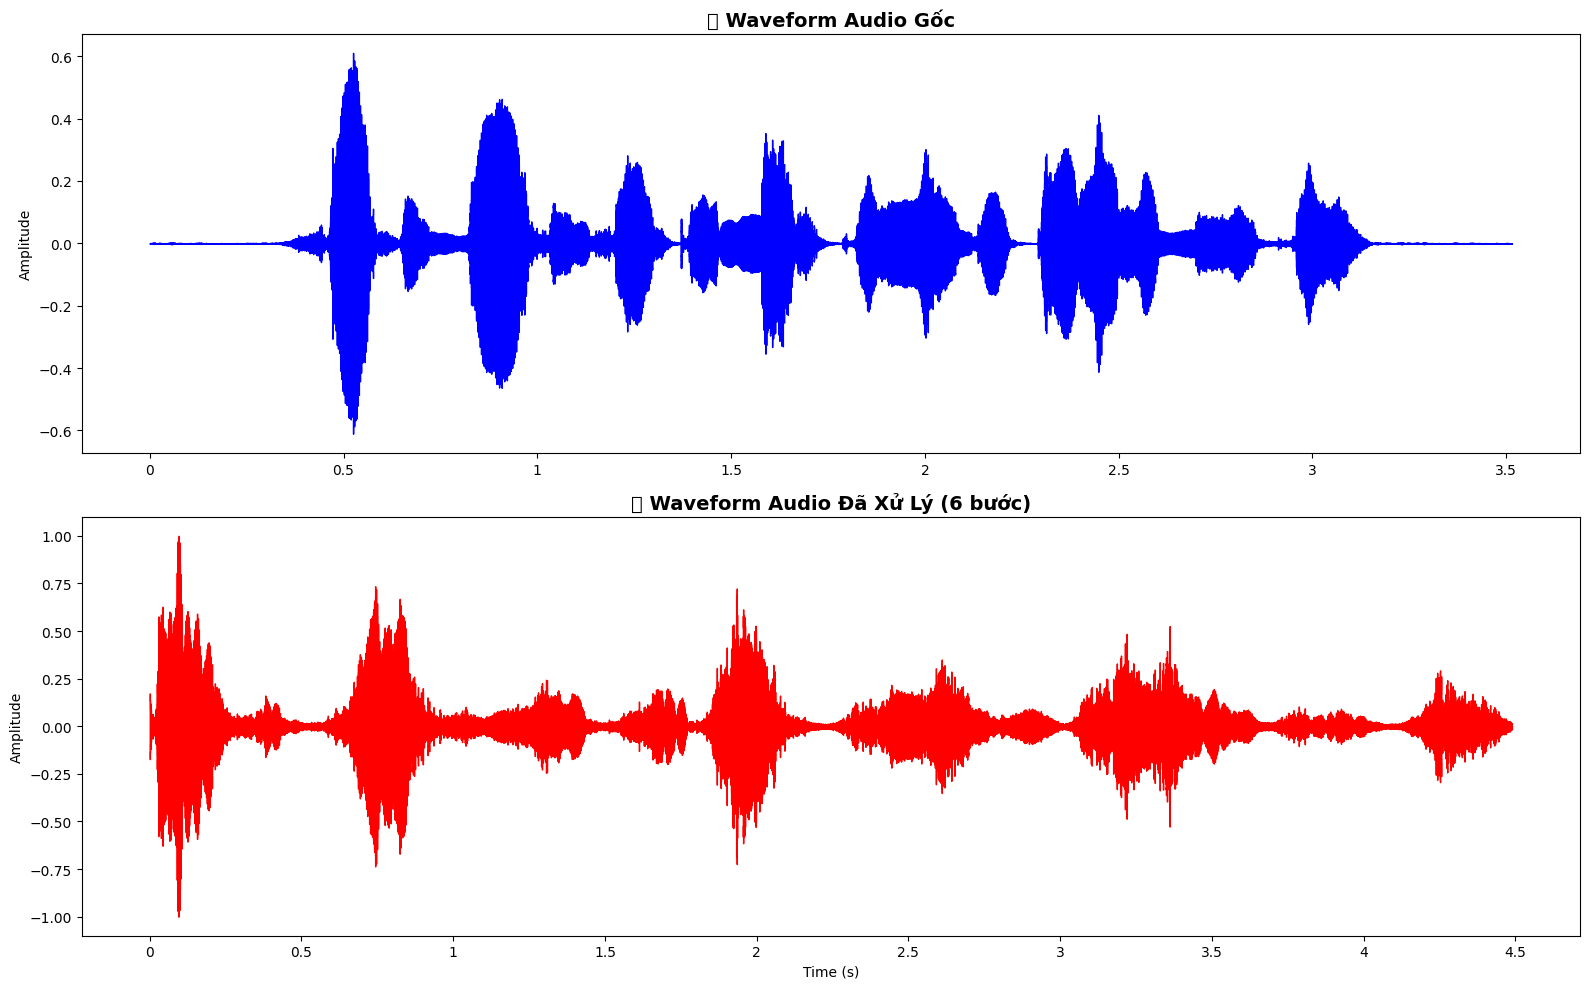

In [23]:

# Load audio g·ªëc
audio = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry\0001_000358.wav" 
sr = 22050
y, sr = librosa.load(audio, sr=sr)

# Load audio ƒë√£ x·ª≠ l√Ω
audio_processed = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry\0001_000358_processed.wav" 
y_processed, sr = librosa.load(audio_processed, sr=sr)

# T·∫°o subplot v·ªõi 2 h√¨nh tr√™n c√πng m·ªôt khung
plt.figure(figsize=(16, 10))

# Subplot 1: Audio g·ªëc
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('üéµ Waveform Audio G·ªëc', fontsize=14, fontweight='bold')
plt.xlabel('')  # B·ªè xlabel cho subplot ƒë·∫ßu
plt.ylabel('Amplitude')

# Subplot 2: Audio ƒë√£ x·ª≠ l√Ω
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_processed, sr=sr, color='red')
plt.title('üîß Waveform Audio ƒê√£ X·ª≠ L√Ω (6 b∆∞·ªõc)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# ƒêi·ªÅu ch·ªânh kho·∫£ng c√°ch gi·ªØa c√°c subplot
plt.tight_layout()

# Hi·ªÉn th·ªã th√¥ng tin so s√°nh
print(f"üìä So s√°nh Audio:")
print(f"   üéµ Audio g·ªëc     - Duration: {len(y)/sr:.2f}s, Shape: {y.shape}")
print(f"   üîß Audio x·ª≠ l√Ω   - Duration: {len(y_processed)/sr:.2f}s, Shape: {y_processed.shape}")
print(f"   üìà Thay ƒë·ªïi th·ªùi gian: {((len(y_processed) - len(y))/len(y)*100):+.1f}%")

plt.show()

In [ ]:
### Th·ª≠ nghi·ªám

In [ ]:
## Ph√¢n t√≠ch cao ƒë·ªô (Pitch) c·ªßa audio g·ªëc v√† audio ƒë√£ x·ª≠ l√Ω ()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\2070206965.py:51: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\2070206965.py:51: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


üéº Th·ªëng k√™ Pitch Analysis:
   üéµ Audio g·ªëc:
      - Pitch trung b√¨nh: 328.2 Hz
      - Pitch min: 147.0 Hz
      - Pitch max: 2802.7 Hz
   üîß Audio x·ª≠ l√Ω:
      - Pitch trung b√¨nh: 733.1 Hz
      - Pitch min: 152.4 Hz
      - Pitch max: 3964.7 Hz
      - T·ª∑ l·ªá thay ƒë·ªïi pitch: 2.234 (+123.4%)


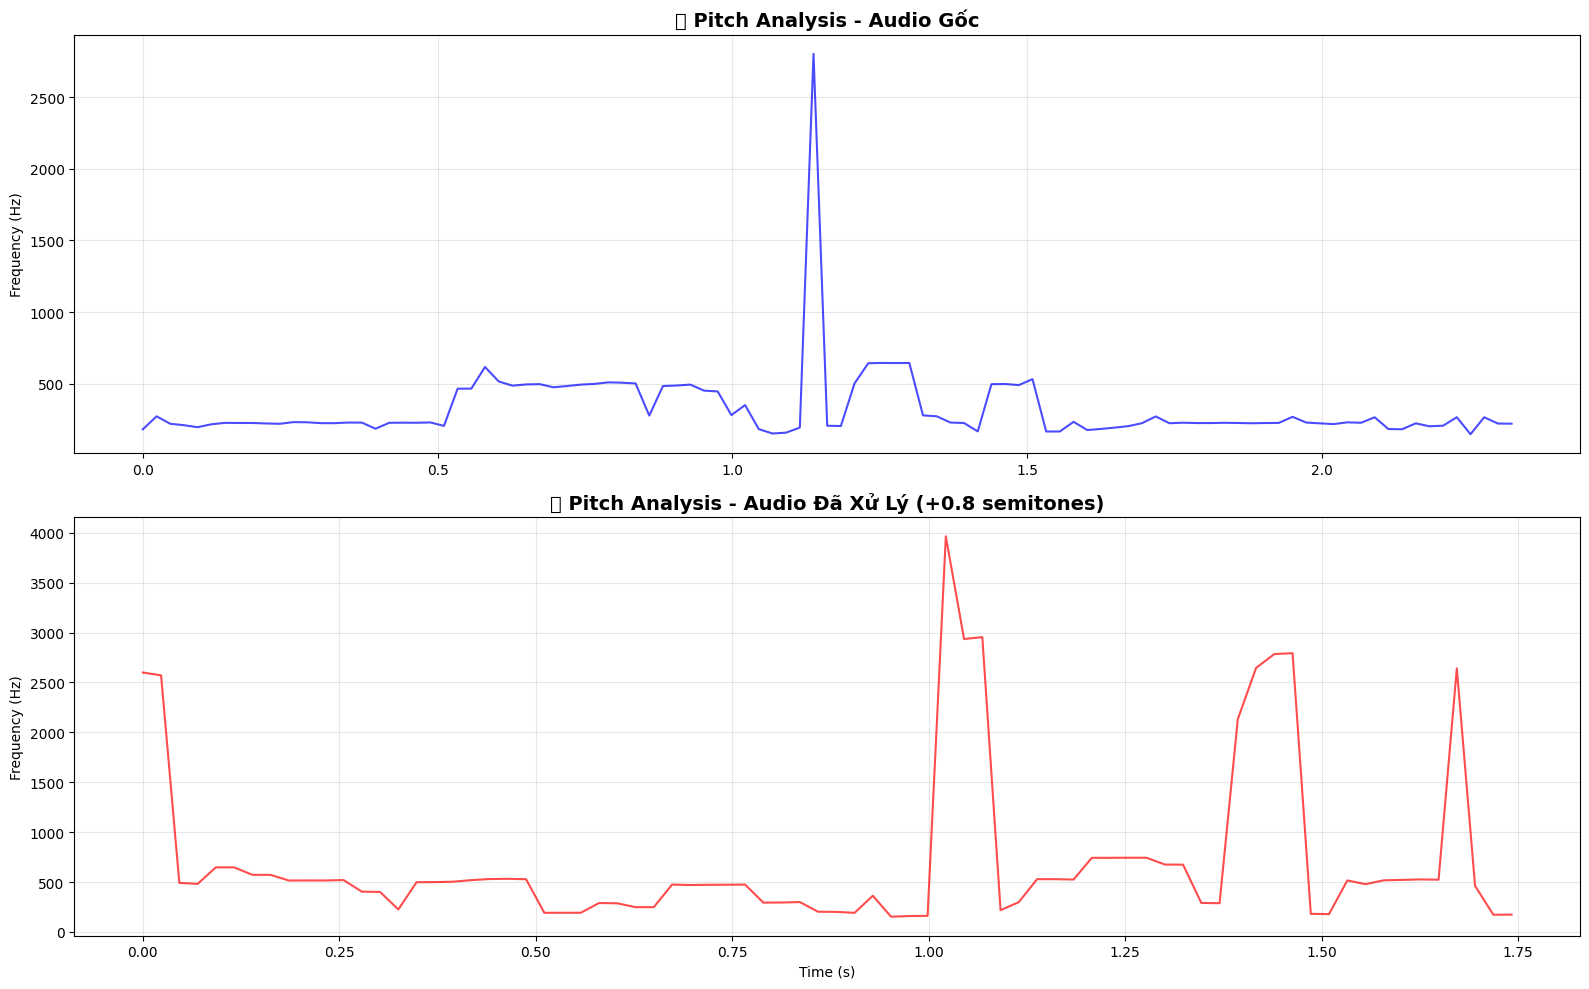

In [42]:
# Ph√¢n t√≠ch cao ƒë·ªô (Pitch) c·ªßa audio g·ªëc v√† audio ƒë√£ x·ª≠ l√Ω
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# T√≠nh to√°n pitch cho audio g·ªëc
pitches_original, magnitudes_original = librosa.piptrack(y=y, sr=sr, threshold=0.1)
pitch_original = []
for t in range(pitches_original.shape[1]):
    index = magnitudes_original[:, t].argmax()
    pitch = pitches_original[index, t]
    pitch_original.append(pitch)

# T√≠nh to√°n pitch cho audio ƒë√£ x·ª≠ l√Ω
pitches_processed, magnitudes_processed = librosa.piptrack(y=y_processed, sr=sr, threshold=0.1)
pitch_processed = []
for t in range(pitches_processed.shape[1]):
    index = magnitudes_processed[:, t].argmax()
    pitch = pitches_processed[index, t]
    pitch_processed.append(pitch)

# T·∫°o time axis
time_original = librosa.frames_to_time(np.arange(len(pitch_original)), sr=sr)
time_processed = librosa.frames_to_time(np.arange(len(pitch_processed)), sr=sr)

# V·∫Ω bi·ªÉu ƒë·ªì pitch
plt.figure(figsize=(16, 10))

# Subplot 1: Pitch c·ªßa audio g·ªëc
plt.subplot(2, 1, 1)
# Ch·ªâ hi·ªÉn th·ªã pitch > 0 (lo·∫°i b·ªè kho·∫£ng l·∫∑ng)
pitch_original_filtered = np.array(pitch_original)
pitch_original_filtered[pitch_original_filtered == 0] = np.nan
plt.plot(time_original, pitch_original_filtered, 'b-', linewidth=1.5, alpha=0.7)
plt.title('üéµ Pitch Analysis - Audio G·ªëc', fontsize=14, fontweight='bold')
plt.ylabel('Frequency (Hz)')
plt.grid(True, alpha=0.3)

# Subplot 2: Pitch c·ªßa audio ƒë√£ x·ª≠ l√Ω
plt.subplot(2, 1, 2)
# Ch·ªâ hi·ªÉn th·ªã pitch > 0 (lo·∫°i b·ªè kho·∫£ng l·∫∑ng)
pitch_processed_filtered = np.array(pitch_processed)
pitch_processed_filtered[pitch_processed_filtered == 0] = np.nan
plt.plot(time_processed, pitch_processed_filtered, 'r-', linewidth=1.5, alpha=0.7)
plt.title('üîß Pitch Analysis - Audio ƒê√£ X·ª≠ L√Ω (+0.8 semitones)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True, alpha=0.3)

plt.tight_layout()

# T√≠nh to√°n th·ªëng k√™ pitch
original_valid_pitch = pitch_original_filtered[~np.isnan(pitch_original_filtered)]
processed_valid_pitch = pitch_processed_filtered[~np.isnan(pitch_processed_filtered)]

print(f"üéº Th·ªëng k√™ Pitch Analysis:")
if len(original_valid_pitch) > 0:
    print(f"   üéµ Audio g·ªëc:")
    print(f"      - Pitch trung b√¨nh: {np.mean(original_valid_pitch):.1f} Hz")
    print(f"      - Pitch min: {np.min(original_valid_pitch):.1f} Hz")
    print(f"      - Pitch max: {np.max(original_valid_pitch):.1f} Hz")

if len(processed_valid_pitch) > 0:
    print(f"   üîß Audio x·ª≠ l√Ω:")
    print(f"      - Pitch trung b√¨nh: {np.mean(processed_valid_pitch):.1f} Hz")
    print(f"      - Pitch min: {np.min(processed_valid_pitch):.1f} Hz")
    print(f"      - Pitch max: {np.max(processed_valid_pitch):.1f} Hz")
    
    if len(original_valid_pitch) > 0:
        pitch_change_ratio = np.mean(processed_valid_pitch) / np.mean(original_valid_pitch)
        print(f"      - T·ª∑ l·ªá thay ƒë·ªïi pitch: {pitch_change_ratio:.3f} ({(pitch_change_ratio-1)*100:+.1f}%)")

plt.show()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\3644684230.py:32: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MyPC\AppData\Local\Temp\ipykernel_24512\3644684230.py:32: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


üéº Th·ªëng k√™ Fundamental Frequency (F0):
   üéµ Audio g·ªëc - F0 trung b√¨nh: 143.8 Hz
   üîß Audio x·ª≠ l√Ω - F0 trung b√¨nh: 191.2 Hz
   üìà Thay ƒë·ªïi F0: +33.0%


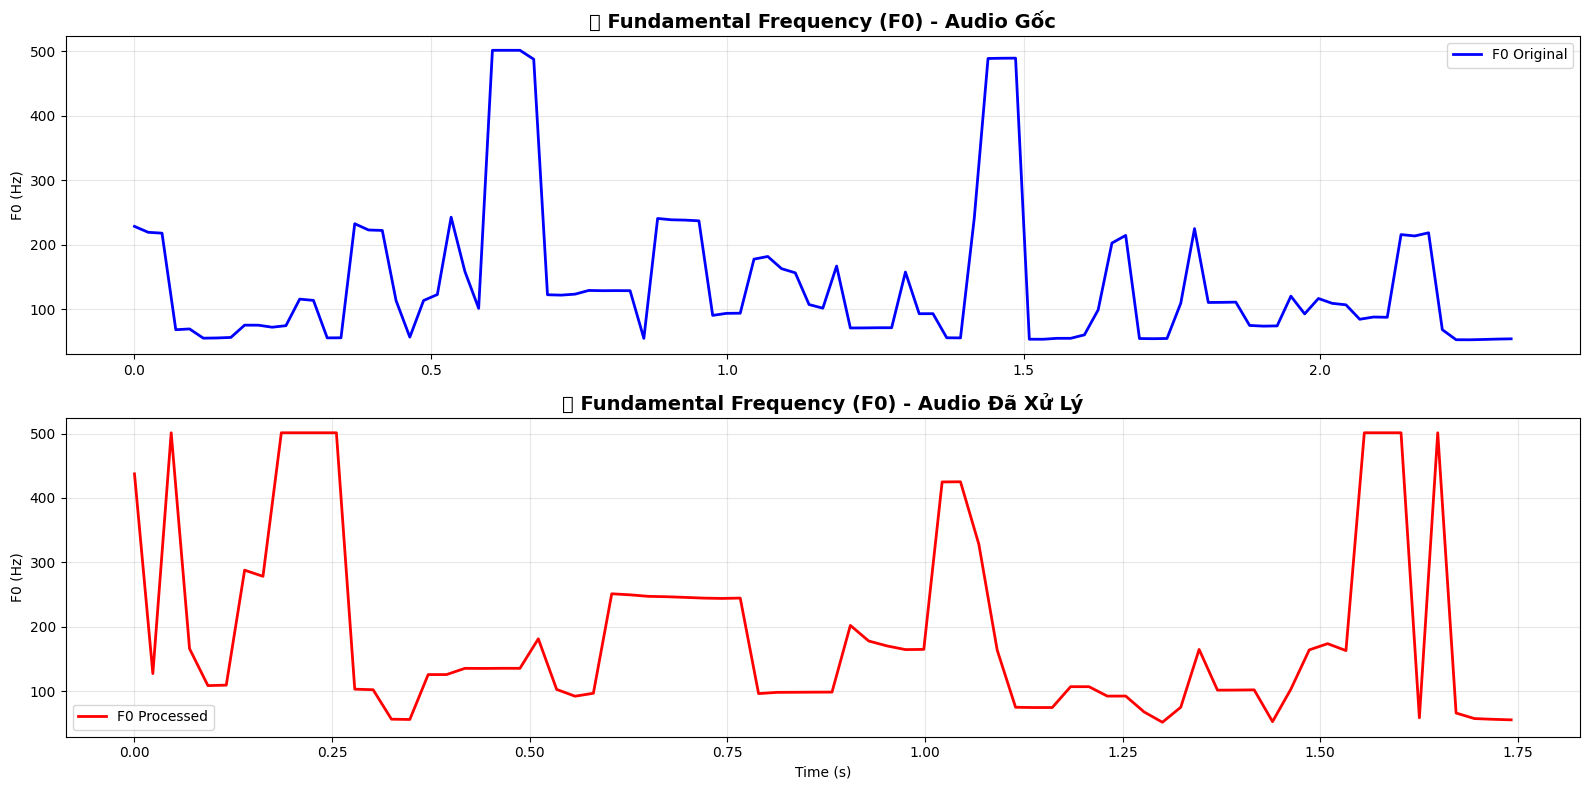

In [43]:
# Ph∆∞∆°ng ph√°p ƒë∆°n gi·∫£n h∆°n ƒë·ªÉ xem pitch s·ª≠ d·ª•ng librosa.yin (YIN algorithm)
import matplotlib.pyplot as plt
import librosa
import numpy as np

# T√≠nh F0 (fundamental frequency) cho audio g·ªëc
f0_original = librosa.yin(y, sr=sr, fmin=50, fmax=500)  # Gi·ªõi h·∫°n t·∫ßn s·ªë cho gi·ªçng n√≥i
f0_processed = librosa.yin(y_processed, sr=sr, fmin=50, fmax=500)

# T·∫°o time axis
time_original = librosa.frames_to_time(np.arange(len(f0_original)), sr=sr)
time_processed = librosa.frames_to_time(np.arange(len(f0_processed)), sr=sr)

# V·∫Ω bi·ªÉu ƒë·ªì F0
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(time_original, f0_original, 'b-', linewidth=2, label='F0 Original')
plt.title('üéµ Fundamental Frequency (F0) - Audio G·ªëc', fontsize=14, fontweight='bold')
plt.ylabel('F0 (Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_processed, f0_processed, 'r-', linewidth=2, label='F0 Processed')
plt.title('üîß Fundamental Frequency (F0) - Audio ƒê√£ X·ª≠ L√Ω', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('F0 (Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()

# Th·ªëng k√™ F0
print(f"üéº Th·ªëng k√™ Fundamental Frequency (F0):")
print(f"   üéµ Audio g·ªëc - F0 trung b√¨nh: {np.mean(f0_original):.1f} Hz")
print(f"   üîß Audio x·ª≠ l√Ω - F0 trung b√¨nh: {np.mean(f0_processed):.1f} Hz")
print(f"   üìà Thay ƒë·ªïi F0: {((np.mean(f0_processed) - np.mean(f0_original))/np.mean(f0_original)*100):+.1f}%")

plt.show()

In [ ]:
## L√†m v·ªõi d·∫°ng 1 danh s√°ch nhi·ªÅu file trong 1 folder Crema\angry

In [48]:
# B∆∞·ªõc 1: L·∫•y danh s√°ch t·∫•t c·∫£ file .wav trong th∆∞ m·ª•c Crema/angry
import os
import glob
from pathlib import Path

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a file audio g·ªëc
input_folder = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry"
output_folder = r"D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry"

# L·∫•y danh s√°ch t·∫•t c·∫£ file .wav
audio_files = glob.glob(os.path.join(input_folder, "*.wav"))

print(f"üìÅ Th∆∞ m·ª•c input: {input_folder}")
print(f"üìÇ Th∆∞ m·ª•c output: {output_folder}")
print(f"üéµ T√¨m th·∫•y {len(audio_files)} file .wav:")

# Hi·ªÉn th·ªã 10 file ƒë·∫ßu ti√™n
for i, file_path in enumerate(audio_files[:10]):
    filename = os.path.basename(file_path)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"   {i+1:2d}. {filename} ({file_size:.1f} KB)")

if len(audio_files) > 10:
    print(f"   ... v√† {len(audio_files) - 10} file kh√°c")

# T·∫°o th∆∞ m·ª•c output n·∫øu ch∆∞a c√≥
os.makedirs(output_folder, exist_ok=True)
print(f"\n‚úÖ ƒê√£ chu·∫©n b·ªã th∆∞ m·ª•c output: {output_folder}")

üìÅ Th∆∞ m·ª•c input: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema\angry
üìÇ Th∆∞ m·ª•c output: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry
üéµ T√¨m th·∫•y 82 file .wav:
    1. 0001_000358.wav (109.9 KB)
    2. 0001_000359.wav (100.9 KB)
    3. 0001_000361.wav (101.4 KB)
    4. 0001_000364.wav (113.4 KB)
    5. 0001_000366.wav (86.6 KB)
    6. 0001_000367.wav (86.9 KB)
    7. 0001_000370.wav (88.3 KB)
    8. 0001_000373.wav (99.4 KB)
    9. 0001_000374.wav (124.7 KB)
   10. 0001_000375.wav (97.8 KB)
   ... v√† 72 file kh√°c

‚úÖ ƒê√£ chu·∫©n b·ªã th∆∞ m·ª•c output: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry


In [49]:
# B∆∞·ªõc 2: Function x·ª≠ l√Ω h√†ng lo·∫°t - √°p d·ª•ng 6 b∆∞·ªõc cho t·ª´ng file
import time
from scipy.io.wavfile import write

def process_single_audio_file(input_path, output_path, sr=22050):
    """
    X·ª≠ l√Ω 1 file audio v·ªõi 6 b∆∞·ªõc v√† l∆∞u k·∫øt qu·∫£
    """
    try:
        # Load audio
        y, sr = librosa.load(input_path, sr=sr)
        
        # √Åp d·ª•ng 6 b∆∞·ªõc x·ª≠ l√Ω tu·∫ßn t·ª±
        processed_audio = y.copy()
        
        # B∆∞·ªõc 1: Chu·∫©n h√≥a
        processed_audio = normalize_audio(processed_audio, target_range=5)
        
        # B∆∞·ªõc 2: Trim silence
        processed_audio = trim_silence(processed_audio, sr, top_db=20)
        
        # B∆∞·ªõc 3: Gi·∫£m nhi·ªÖu
        processed_audio = reduce_noise(processed_audio, sr)
        
        # B∆∞·ªõc 4: Time stretch
        processed_audio = time_stretch(processed_audio, rate=0.6)
        
        # B∆∞·ªõc 5: Pitch shift
        processed_audio = pitch_shift(processed_audio, sr, n_steps=0.8)
        
        # B∆∞·ªõc 6: Th√™m Gaussian noise
        processed_audio = add_gaussian_noise(processed_audio, noise_level=0.005)
        
        # Chu·∫©n h√≥a ƒë·ªÉ l∆∞u file
        normalized_for_save = processed_audio / np.max(np.abs(processed_audio))
        
        # L∆∞u file
        write(output_path, sr, (normalized_for_save * 32767).astype(np.int16))
        
        return {
            'status': 'success',
            'original_duration': len(y) / sr,
            'processed_duration': len(processed_audio) / sr,
            'file_size': os.path.getsize(output_path) / 1024  # KB
        }
        
    except Exception as e:
        return {
            'status': 'error',
            'error': str(e)
        }

def batch_process_audio_files(audio_files, input_folder, output_folder):
    """
    X·ª≠ l√Ω h√†ng lo·∫°t nhi·ªÅu file audio
    """
    results = []
    successful = 0
    failed = 0
    
    print(f"üöÄ B·∫Øt ƒë·∫ßu x·ª≠ l√Ω {len(audio_files)} file audio...")
    print("=" * 60)
    
    start_time = time.time()
    
    for i, input_path in enumerate(audio_files):
        # T·∫°o ƒë∆∞·ªùng d·∫´n output
        filename = os.path.basename(input_path)
        name_without_ext = os.path.splitext(filename)[0]
        output_filename = f"{name_without_ext}_processed.wav"
        output_path = os.path.join(output_folder, output_filename)
        
        # Ki·ªÉm tra n·∫øu file ƒë√£ x·ª≠ l√Ω
        if os.path.exists(output_path):
            print(f"‚è≠Ô∏è  {i+1:2d}/{len(audio_files)} - {filename} - ƒê√£ t·ªìn t·∫°i, b·ªè qua")
            continue
        
        print(f"üîÑ {i+1:2d}/{len(audio_files)} - ƒêang x·ª≠ l√Ω: {filename}")
        
        # X·ª≠ l√Ω file
        result = process_single_audio_file(input_path, output_path)
        result['filename'] = filename
        result['input_path'] = input_path
        result['output_path'] = output_path
        results.append(result)
        
        if result['status'] == 'success':
            successful += 1
            duration_change = ((result['processed_duration'] - result['original_duration']) 
                             / result['original_duration'] * 100)
            print(f"   ‚úÖ Th√†nh c√¥ng - {result['original_duration']:.2f}s ‚Üí {result['processed_duration']:.2f}s ({duration_change:+.1f}%)")
        else:
            failed += 1
            print(f"   ‚ùå L·ªói: {result['error']}")
        
        # Hi·ªÉn th·ªã ti·∫øn tr√¨nh
        progress = (i + 1) / len(audio_files) * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i + 1) * len(audio_files) - elapsed
        print(f"   üìä Ti·∫øn tr√¨nh: {progress:.1f}% - ETA: {eta:.1f}s")
        print("-" * 50)
    
    total_time = time.time() - start_time
    
    print(f"\nüéâ HO√ÄN TH√ÄNH X·ª¨ L√ù H√ÄNG LO·∫†T!")
    print(f"   ‚úÖ Th√†nh c√¥ng: {successful} file")
    print(f"   ‚ùå Th·∫•t b·∫°i: {failed} file")
    print(f"   ‚è±Ô∏è  T·ªïng th·ªùi gian: {total_time:.2f}s")
    print(f"   ‚ö° Trung b√¨nh: {total_time/len(audio_files):.2f}s/file")
    
    return results

print("‚úì ƒê√£ ƒë·ªãnh nghƒ©a c√°c function x·ª≠ l√Ω h√†ng lo·∫°t")

‚úì ƒê√£ ƒë·ªãnh nghƒ©a c√°c function x·ª≠ l√Ω h√†ng lo·∫°t


In [50]:
# B∆∞·ªõc 3: Th·ª±c hi·ªán x·ª≠ l√Ω h√†ng lo·∫°t t·∫•t c·∫£ file
# C√≥ th·ªÉ ch·ªçn x·ª≠ l√Ω m·ªôt s·ªë file ƒë·ªÉ test tr∆∞·ªõc
TEST_MODE = True  # ƒê·∫∑t True ƒë·ªÉ test v·ªõi 3 file ƒë·∫ßu, False ƒë·ªÉ x·ª≠ l√Ω t·∫•t c·∫£

if TEST_MODE:
    # Ch·ªâ x·ª≠ l√Ω 3 file ƒë·∫ßu ƒë·ªÉ test
    files_to_process = audio_files[:3]
    print(f"üß™ TEST MODE: Ch·ªâ x·ª≠ l√Ω {len(files_to_process)} file ƒë·∫ßu ti√™n")
else:
    # X·ª≠ l√Ω t·∫•t c·∫£ file
    files_to_process = audio_files
    print(f"üöÄ FULL MODE: X·ª≠ l√Ω t·∫•t c·∫£ {len(files_to_process)} file")

print(f"üìã Danh s√°ch file s·∫Ω x·ª≠ l√Ω:")
for i, file_path in enumerate(files_to_process):
    print(f"   {i+1}. {os.path.basename(file_path)}")

print(f"\n‚ö†Ô∏è  CH√ö √ù: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t kh√° l√¢u!")
print(f"   - ∆Ø·ªõc t√≠nh: {len(files_to_process) * 30:.0f}s - {len(files_to_process) * 60:.0f}s")
print(f"   - M·ªói file c·∫ßn kho·∫£ng 30-60s ƒë·ªÉ x·ª≠ l√Ω")

# B·∫Øt ƒë·∫ßu x·ª≠ l√Ω
results = batch_process_audio_files(files_to_process, input_folder, output_folder)

üß™ TEST MODE: Ch·ªâ x·ª≠ l√Ω 3 file ƒë·∫ßu ti√™n
üìã Danh s√°ch file s·∫Ω x·ª≠ l√Ω:
   1. 0001_000358.wav
   2. 0001_000359.wav
   3. 0001_000361.wav

‚ö†Ô∏è  CH√ö √ù: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t kh√° l√¢u!
   - ∆Ø·ªõc t√≠nh: 90s - 180s
   - M·ªói file c·∫ßn kho·∫£ng 30-60s ƒë·ªÉ x·ª≠ l√Ω
üöÄ B·∫Øt ƒë·∫ßu x·ª≠ l√Ω 3 file audio...
üîÑ  1/3 - ƒêang x·ª≠ l√Ω: 0001_000358.wav
   ‚úÖ Th√†nh c√¥ng - 3.52s ‚Üí 4.49s (+27.7%)
   üìä Ti·∫øn tr√¨nh: 33.3% - ETA: 0.3s
--------------------------------------------------
üîÑ  2/3 - ƒêang x·ª≠ l√Ω: 0001_000359.wav
   ‚úÖ Th√†nh c√¥ng - 3.23s ‚Üí 4.14s (+28.3%)
   üìä Ti·∫øn tr√¨nh: 66.7% - ETA: 0.1s
--------------------------------------------------
üîÑ  3/3 - ƒêang x·ª≠ l√Ω: 0001_000361.wav
   ‚úÖ Th√†nh c√¥ng - 3.24s ‚Üí 4.18s (+28.8%)
   üìä Ti·∫øn tr√¨nh: 100.0% - ETA: 0.0s
--------------------------------------------------

üéâ HO√ÄN TH√ÄNH X·ª¨ L√ù H√ÄNG LO·∫†T!
   ‚úÖ Th√†nh c√¥ng: 3 file
   ‚ùå Th·∫•t b·∫°i: 0 file
   ‚è±Ô∏è  

üìä TH·ªêNG K√ä CHI TI·∫æT:
‚úÖ File x·ª≠ l√Ω th√†nh c√¥ng: 3
‚ùå File x·ª≠ l√Ω th·∫•t b·∫°i: 0
üìà T·ª∑ l·ªá th√†nh c√¥ng: 100.0%

‚è±Ô∏è  TH·ªúI GIAN X·ª¨ L√ù:
   - Duration g·ªëc trung b√¨nh: 3.33s
   - Duration sau x·ª≠ l√Ω trung b√¨nh: 4.27s
   - Thay ƒë·ªïi th·ªùi gian trung b√¨nh: 28.3%

üìÅ K√çCH TH∆Ø·ªöC FILE:
   - K√≠ch th∆∞·ªõc trung b√¨nh: 183.9 KB
   - T·ªïng dung l∆∞·ª£ng: 551.8 KB (0.5 MB)


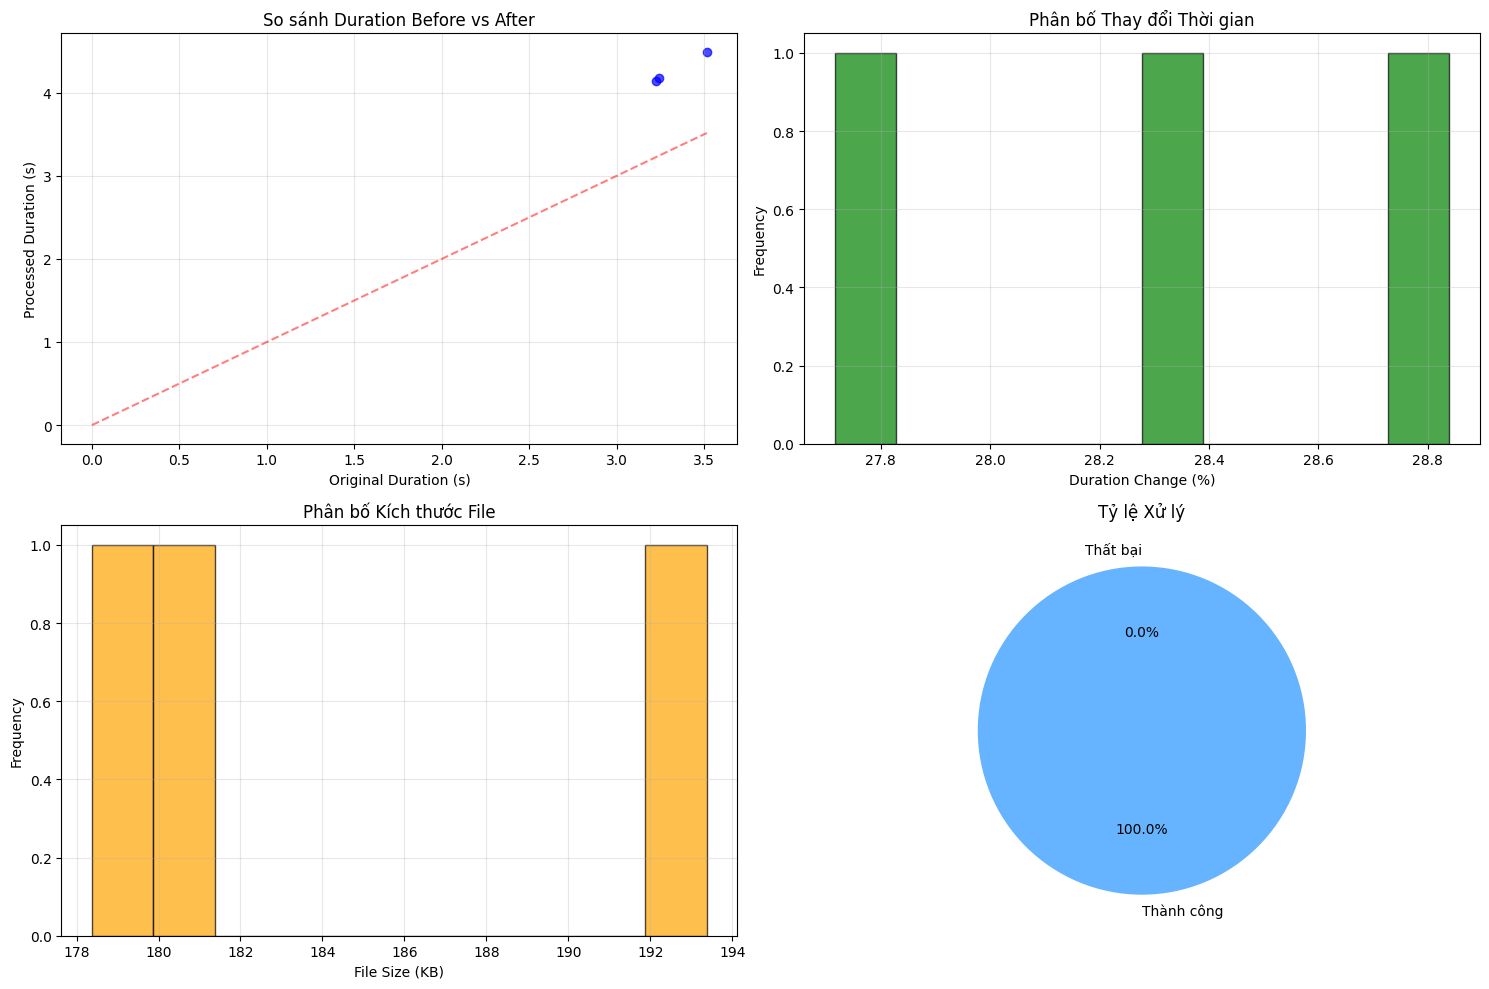


üìã CHI TI·∫æT 5 FILE ƒê·∫¶U TI√äN:
   1. 0001_000358.wav
      Duration: 3.52s ‚Üí 4.49s
      Size: 193.4 KB
   2. 0001_000359.wav
      Duration: 3.23s ‚Üí 4.14s
      Size: 178.4 KB
   3. 0001_000361.wav
      Duration: 3.24s ‚Üí 4.18s
      Size: 180.0 KB

üéØ HO√ÄN TH√ÄNH TO√ÄN B·ªò QU√Å TR√åNH X·ª¨ L√ù H√ÄNG LO·∫†T!
üìÇ K·∫øt qu·∫£ ƒë∆∞·ª£c l∆∞u t·∫°i: D:\filebailam\CD3_Giongnoi\code_speech\data\Crema_processed\angry


In [51]:
# B∆∞·ªõc 4: B√°o c√°o k·∫øt qu·∫£ v√† th·ªëng k√™ chi ti·∫øt
import pandas as pd
import matplotlib.pyplot as plt

# T·∫°o DataFrame t·ª´ k·∫øt qu·∫£ ƒë·ªÉ ph√¢n t√≠ch
successful_results = [r for r in results if r['status'] == 'success']
failed_results = [r for r in results if r['status'] == 'error']

if successful_results:
    df_results = pd.DataFrame(successful_results)
    
    print(f"üìä TH·ªêNG K√ä CHI TI·∫æT:")
    print(f"=" * 50)
    print(f"‚úÖ File x·ª≠ l√Ω th√†nh c√¥ng: {len(successful_results)}")
    print(f"‚ùå File x·ª≠ l√Ω th·∫•t b·∫°i: {len(failed_results)}")
    print(f"üìà T·ª∑ l·ªá th√†nh c√¥ng: {len(successful_results)/(len(results))*100:.1f}%")
    
    print(f"\n‚è±Ô∏è  TH·ªúI GIAN X·ª¨ L√ù:")
    print(f"   - Duration g·ªëc trung b√¨nh: {df_results['original_duration'].mean():.2f}s")
    print(f"   - Duration sau x·ª≠ l√Ω trung b√¨nh: {df_results['processed_duration'].mean():.2f}s")
    print(f"   - Thay ƒë·ªïi th·ªùi gian trung b√¨nh: {((df_results['processed_duration'] - df_results['original_duration']) / df_results['original_duration'] * 100).mean():.1f}%")
    
    print(f"\nüìÅ K√çCH TH∆Ø·ªöC FILE:")
    print(f"   - K√≠ch th∆∞·ªõc trung b√¨nh: {df_results['file_size'].mean():.1f} KB")
    print(f"   - T·ªïng dung l∆∞·ª£ng: {df_results['file_size'].sum():.1f} KB ({df_results['file_size'].sum()/1024:.1f} MB)")
    
    # V·∫Ω bi·ªÉu ƒë·ªì th·ªëng k√™
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Bi·ªÉu ƒë·ªì 1: So s√°nh duration
    axes[0, 0].scatter(df_results['original_duration'], df_results['processed_duration'], alpha=0.7, color='blue')
    axes[0, 0].plot([0, df_results['original_duration'].max()], [0, df_results['original_duration'].max()], 'r--', alpha=0.5)
    axes[0, 0].set_xlabel('Original Duration (s)')
    axes[0, 0].set_ylabel('Processed Duration (s)')
    axes[0, 0].set_title('So s√°nh Duration Before vs After')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Bi·ªÉu ƒë·ªì 2: Histogram thay ƒë·ªïi th·ªùi gian
    duration_change = ((df_results['processed_duration'] - df_results['original_duration']) 
                      / df_results['original_duration'] * 100)
    axes[0, 1].hist(duration_change, bins=10, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].set_xlabel('Duration Change (%)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Ph√¢n b·ªë Thay ƒë·ªïi Th·ªùi gian')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Bi·ªÉu ƒë·ªì 3: File size distribution
    axes[1, 0].hist(df_results['file_size'], bins=10, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].set_xlabel('File Size (KB)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Ph√¢n b·ªë K√≠ch th∆∞·ªõc File')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Bi·ªÉu ƒë·ªì 4: Processing success rate
    labels = ['Th√†nh c√¥ng', 'Th·∫•t b·∫°i']
    sizes = [len(successful_results), len(failed_results)]
    colors = ['#66b3ff', '#ff9999']
    axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('T·ª∑ l·ªá X·ª≠ l√Ω')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nüìã CHI TI·∫æT 5 FILE ƒê·∫¶U TI√äN:")
    for i, result in enumerate(successful_results[:5]):
        print(f"   {i+1}. {result['filename']}")
        print(f"      Duration: {result['original_duration']:.2f}s ‚Üí {result['processed_duration']:.2f}s")
        print(f"      Size: {result['file_size']:.1f} KB")

if failed_results:
    print(f"\n‚ùå FILE X·ª¨ L√ù TH·∫§T B·∫†I:")
    for i, result in enumerate(failed_results):
        print(f"   {i+1}. {result['filename']} - L·ªói: {result['error']}")

print(f"\nüéØ HO√ÄN TH√ÄNH TO√ÄN B·ªò QU√Å TR√åNH X·ª¨ L√ù H√ÄNG LO·∫†T!")
print(f"üìÇ K·∫øt qu·∫£ ƒë∆∞·ª£c l∆∞u t·∫°i: {output_folder}")